<a href="https://colab.research.google.com/github/AyaDr/Project/blob/main/Copie_de_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Pour uploader le fichier depuis votre ordinateur
from google.colab import files

uploaded = files.upload()  # Ouvre la boîte de dialogue pour choisir le fichier

# Récupérer le nom du fichier uploadé
for fn in uploaded.keys():
    file_name = fn

# Charger le fichier CSV
df = pd.read_csv(file_name)

# Afficher un aperçu
print(df.head())
print(df.info())


Saving carclaims.csv.zip to carclaims.csv.zip
  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  Ex

Dimensions du dataset : (15420, 33)

Types de variables :
Month                   int64
WeekOfMonth             int64
DayOfWeek               int64
Make                    int64
AccidentArea            int64
DayOfWeekClaimed        int64
MonthClaimed            int64
WeekOfMonthClaimed      int64
Sex                     int64
MaritalStatus           int64
Age                     int64
Fault                   int64
PolicyType              int64
VehicleCategory         int64
VehiclePrice            int64
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
Days:Policy-Accident    int64
Days:Policy-Claim       int64
PastNumberOfClaims      int64
AgeOfVehicle            int64
AgeOfPolicyHolder       int64
PoliceReportFiled       int64
WitnessPresent          int64
AgentType               int64
NumberOfSuppliments     int64
AddressChange-Claim     int64
NumberOfCars            int64
Year                    int64
BasePolicy  

/tmp/ipython-input-2491628069.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FraudFound', data=df, palette=['#66b3ff','#ff6666'])


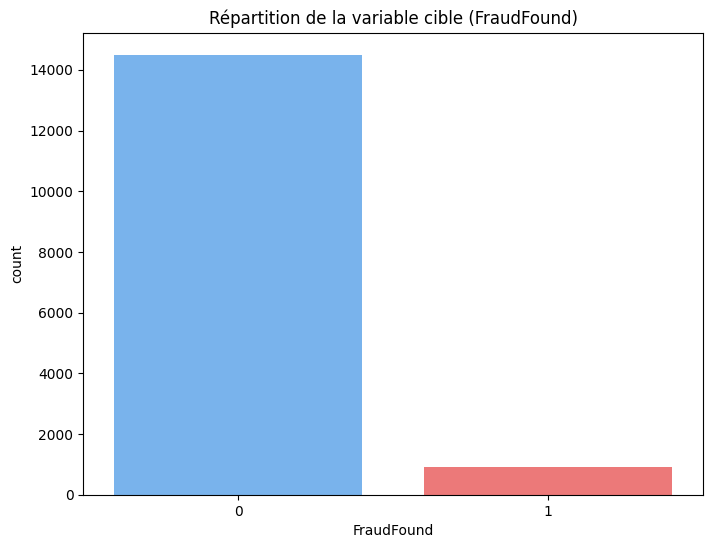

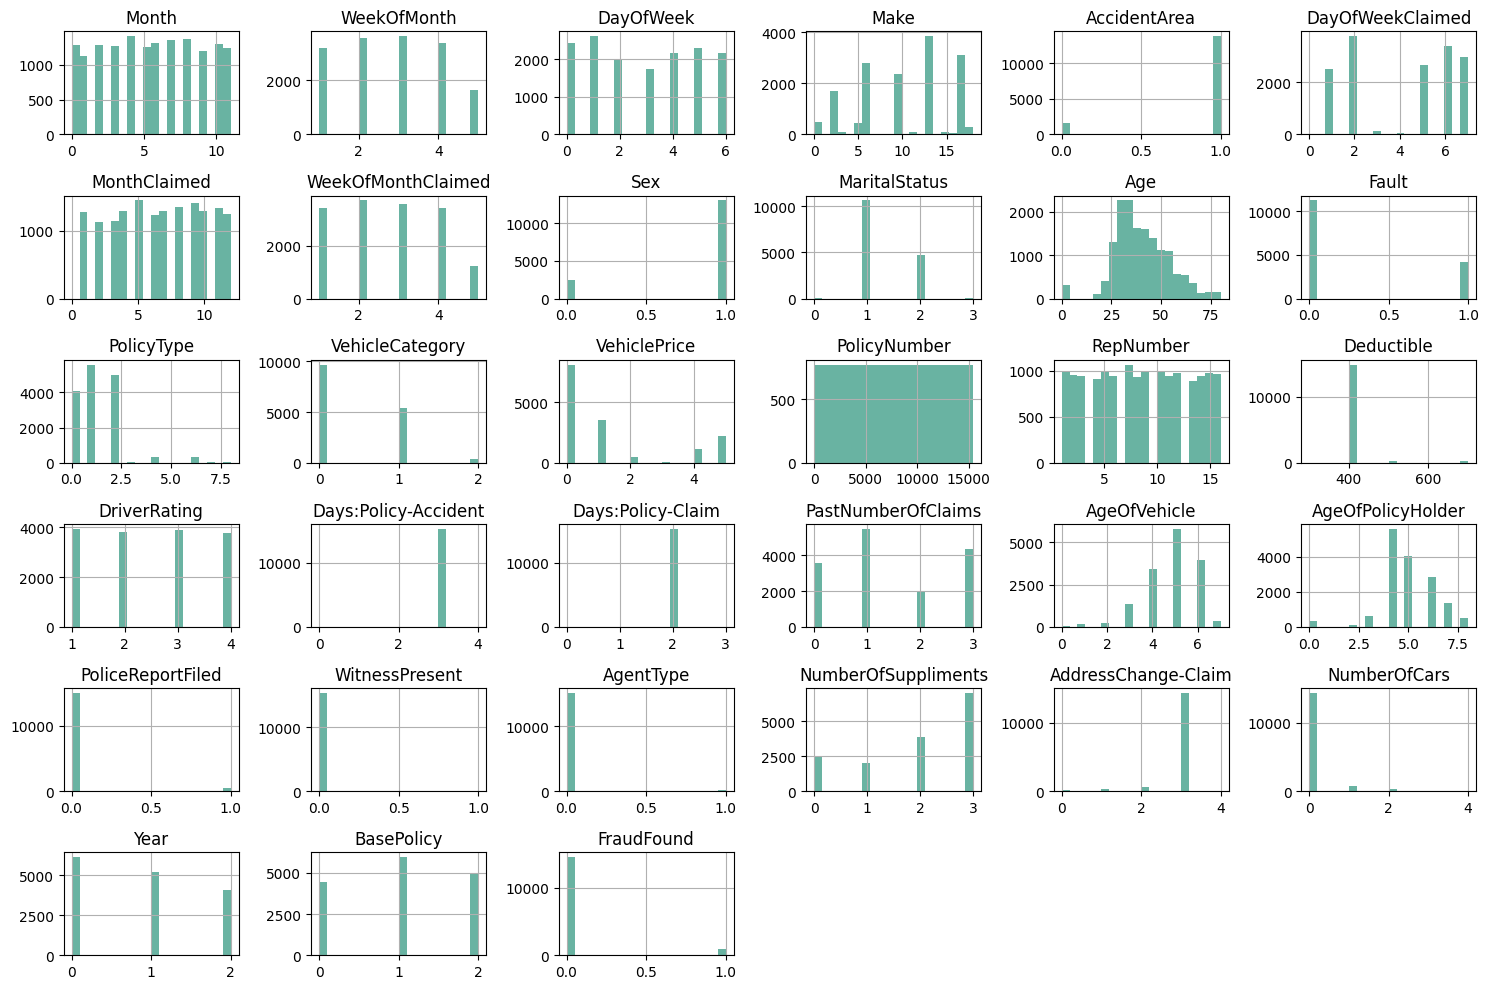

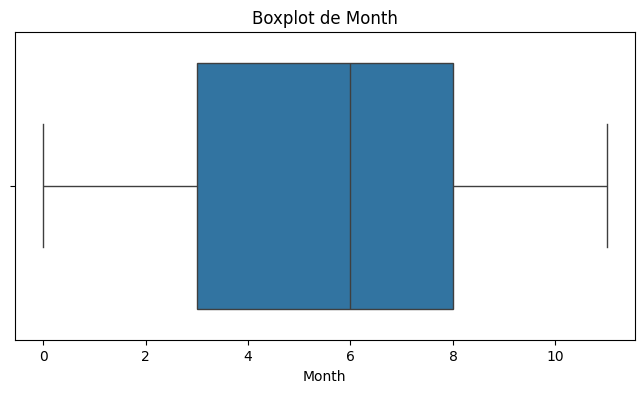

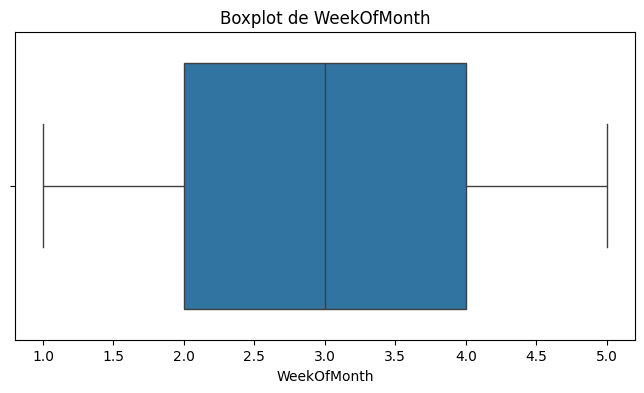

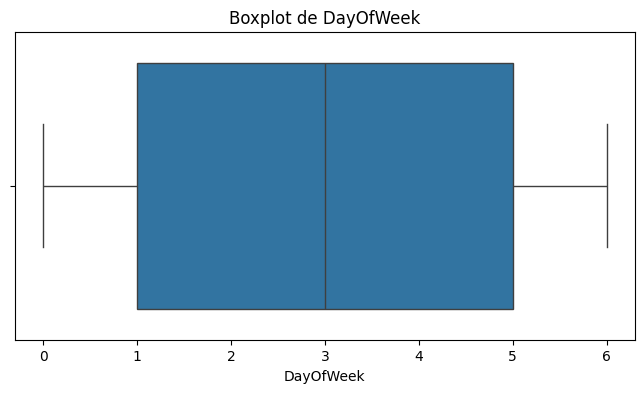

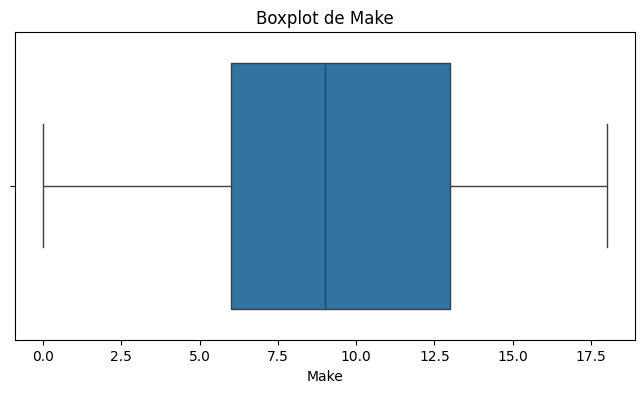

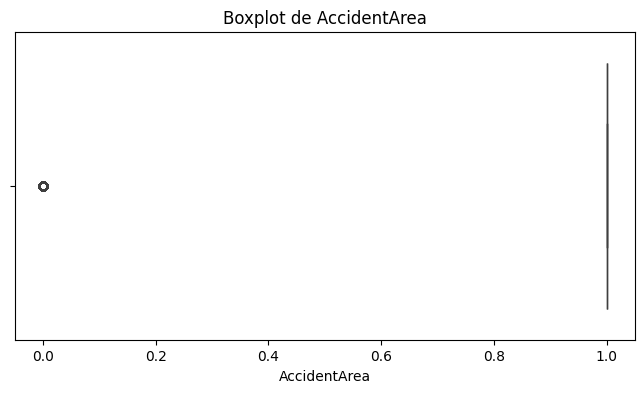

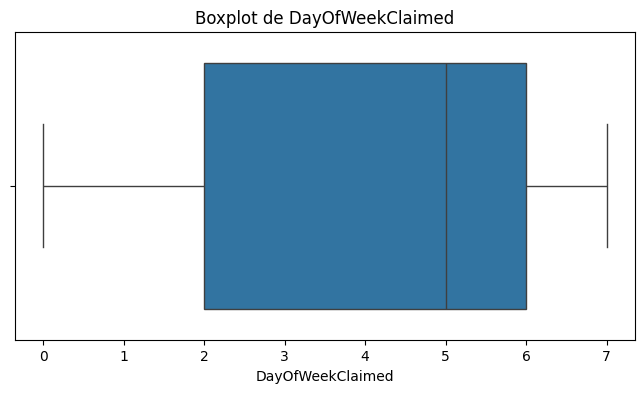

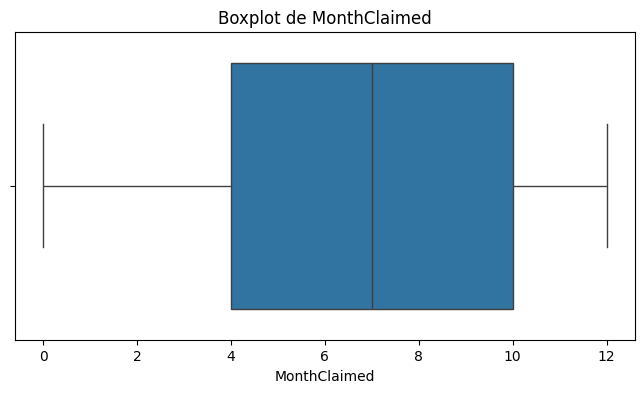

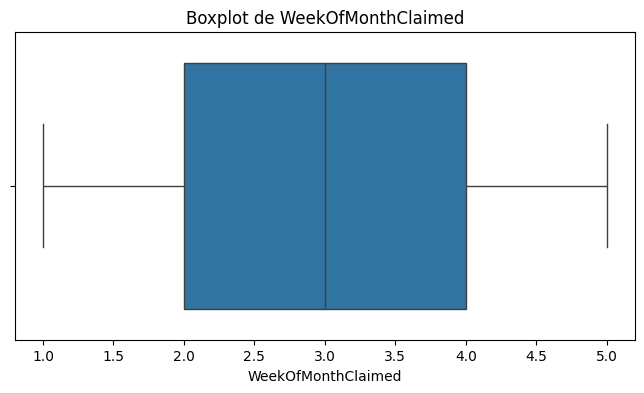

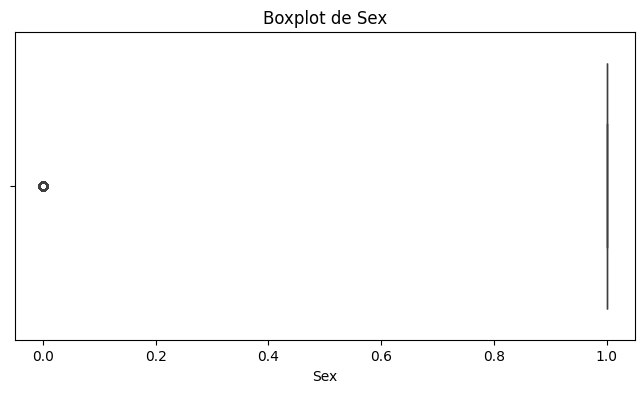

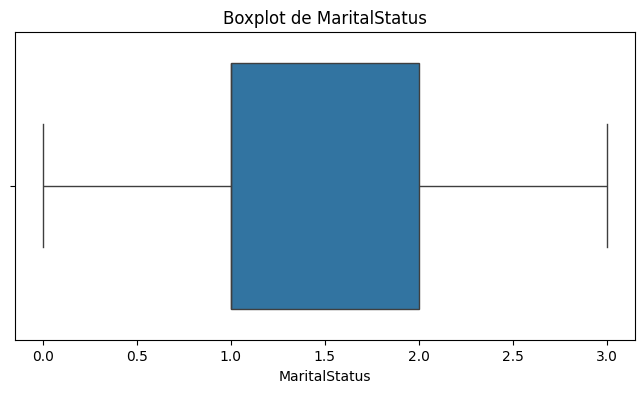

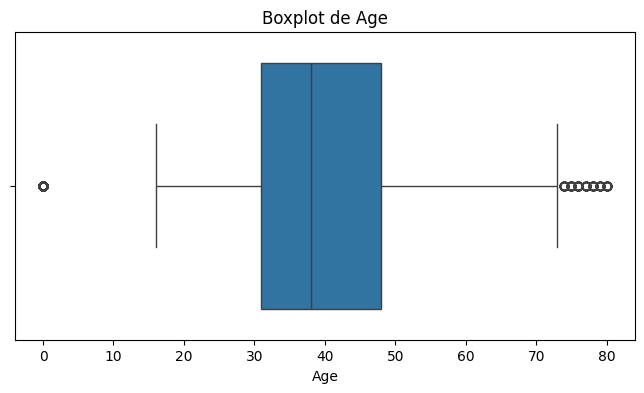

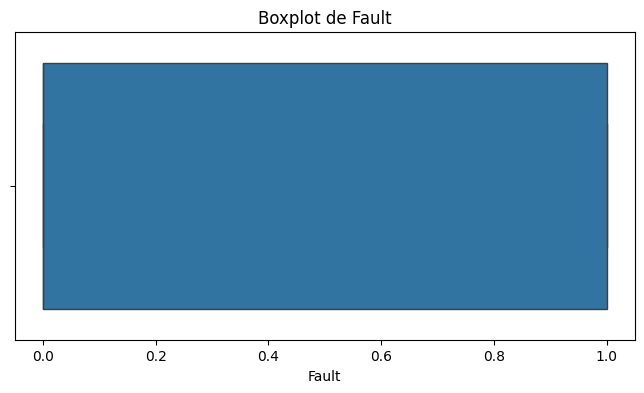

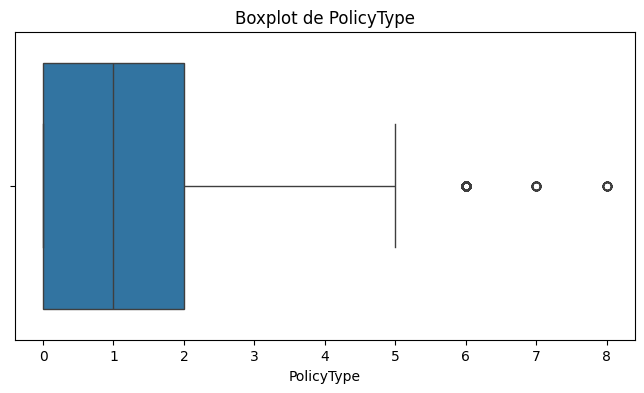

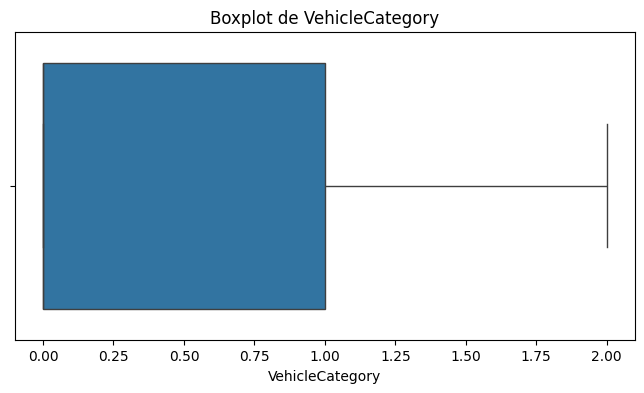

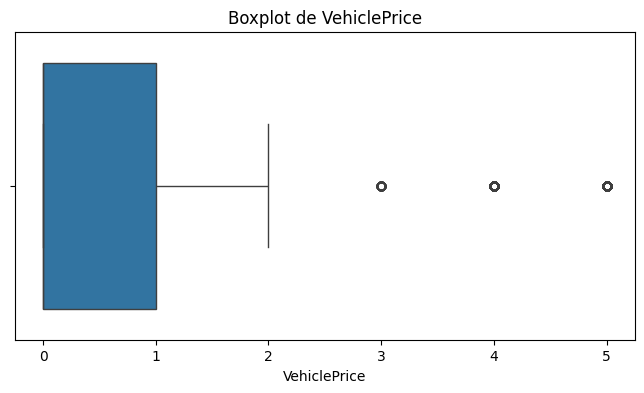

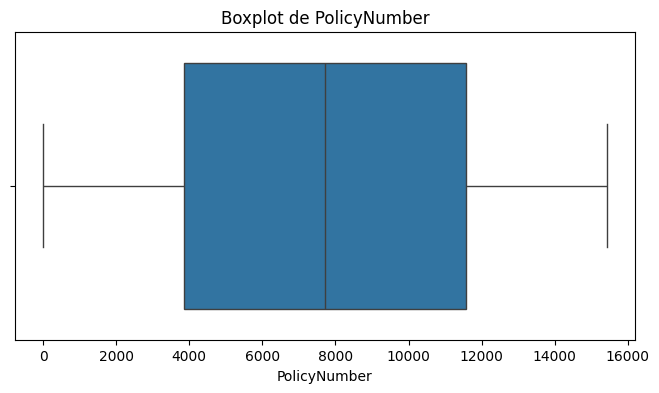

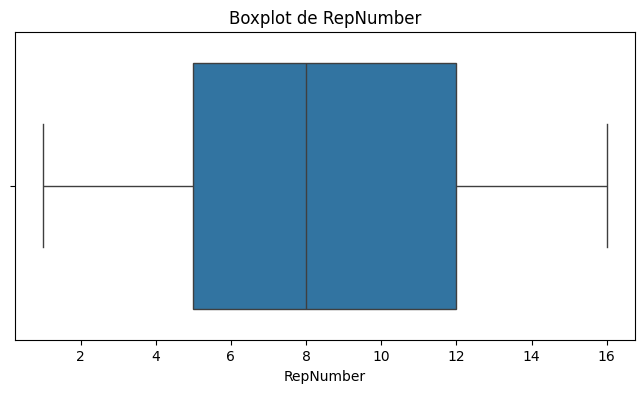

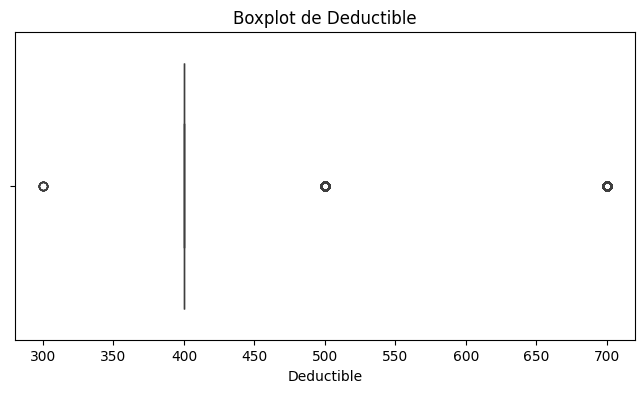

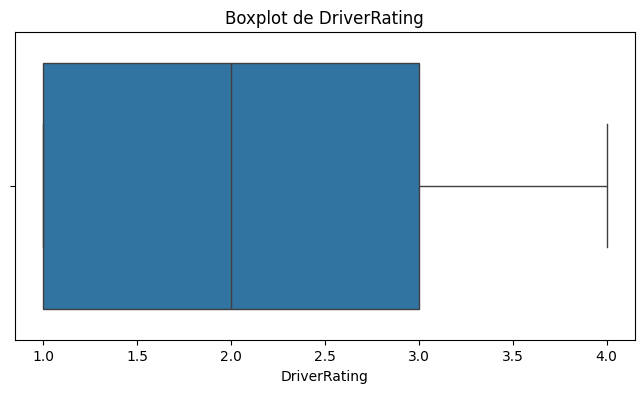

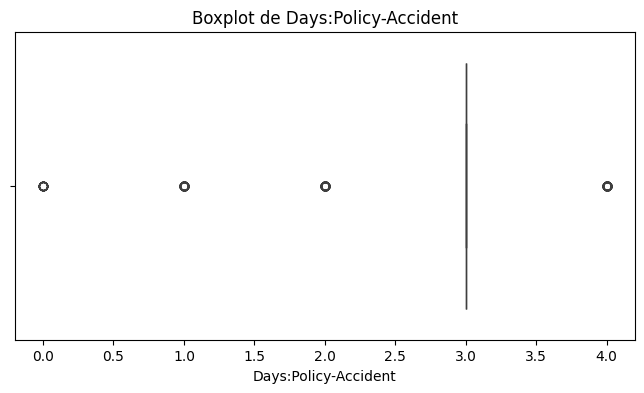

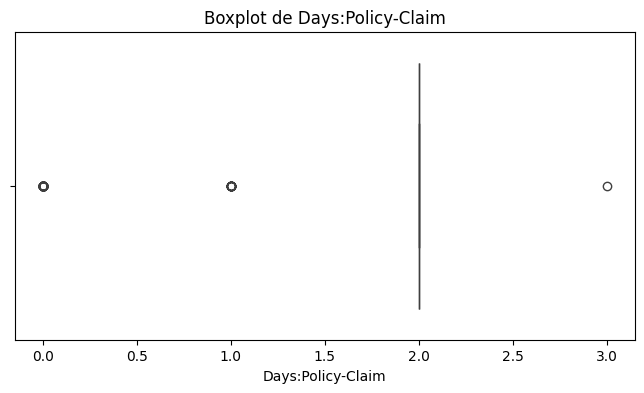

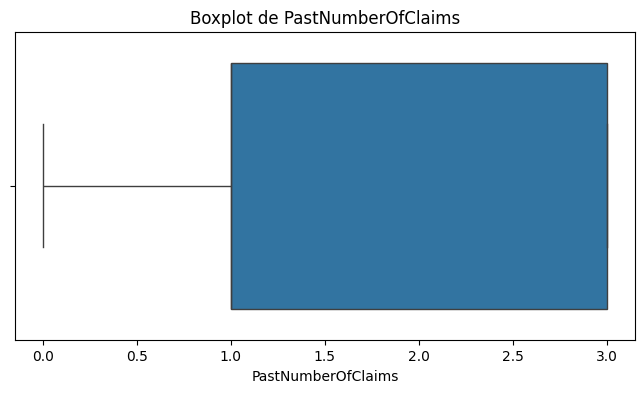

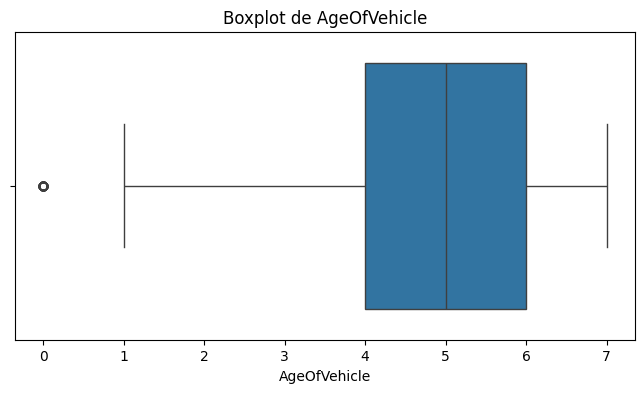

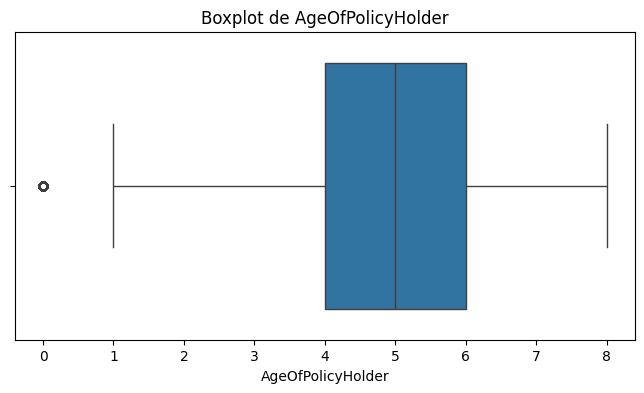

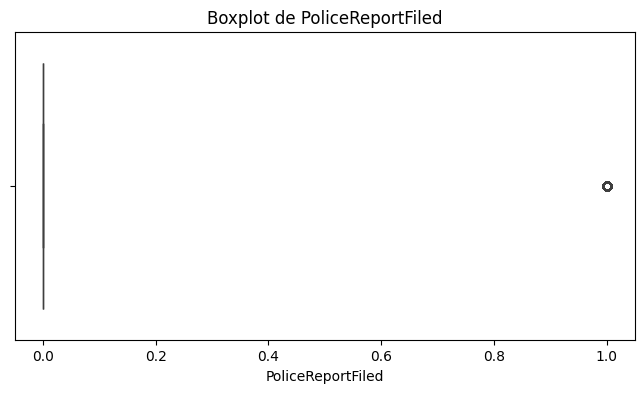

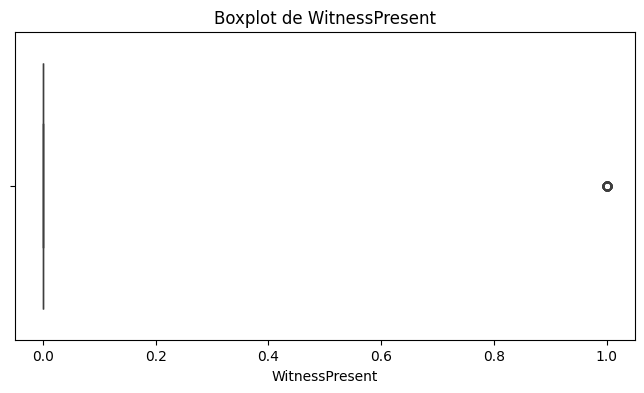

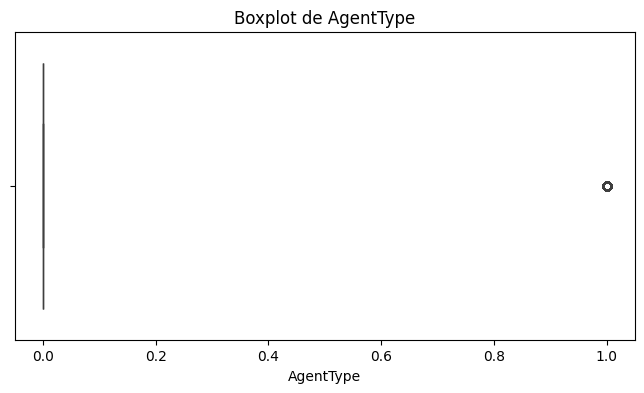

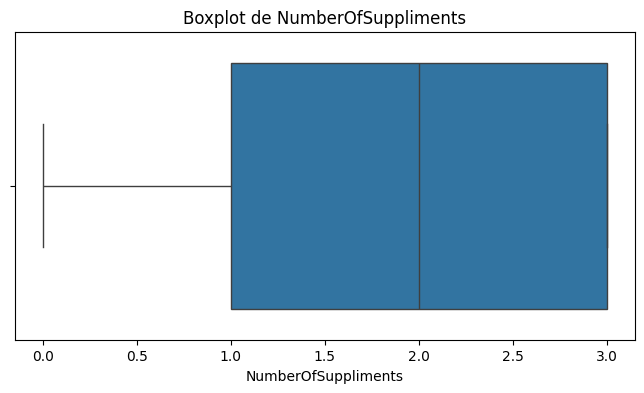

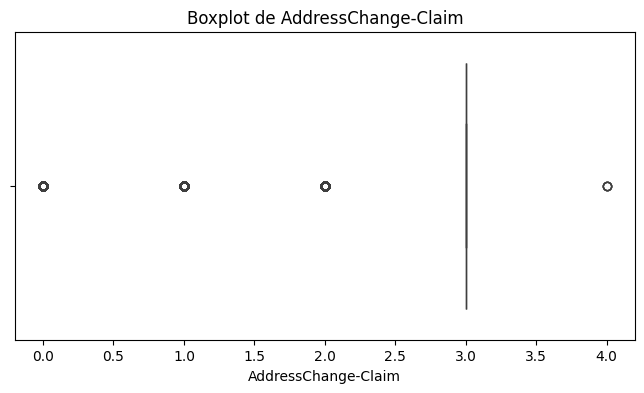

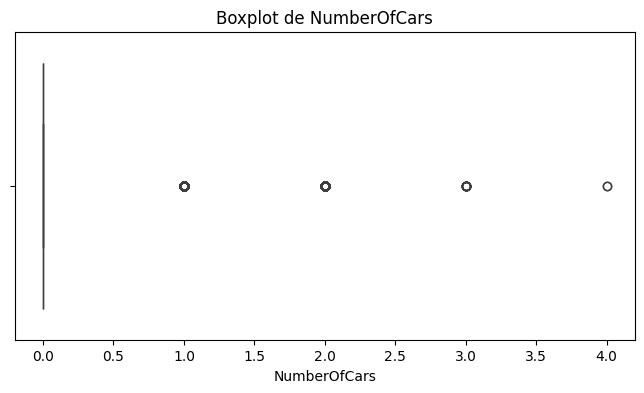

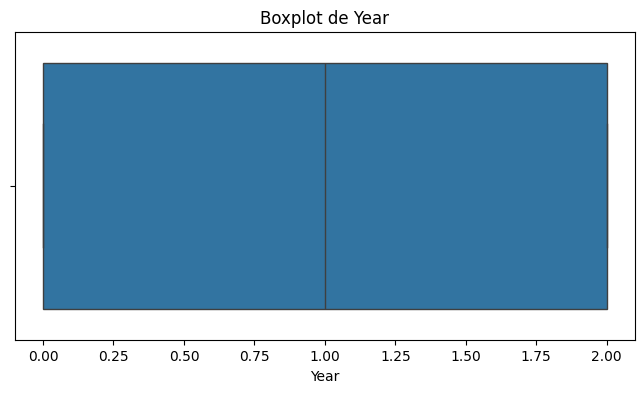

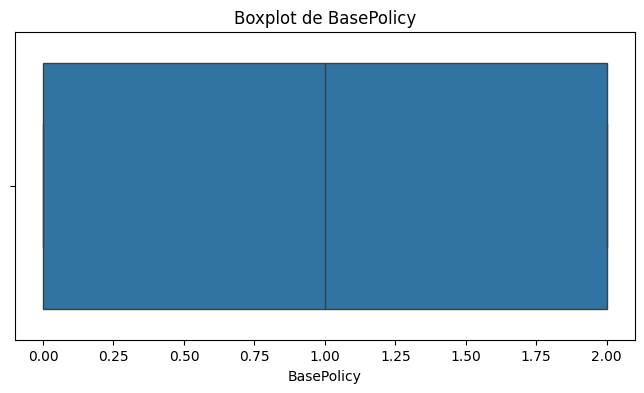

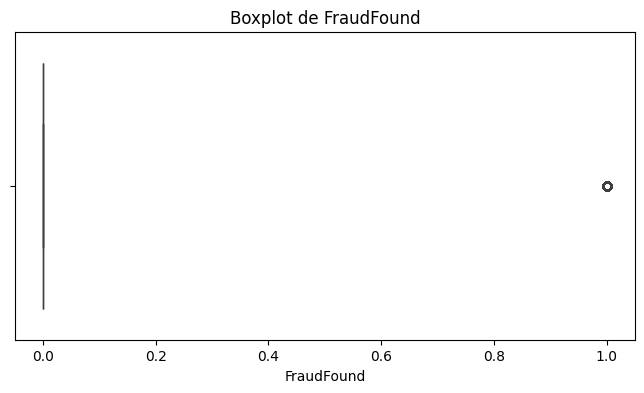

In [ ]:
# -------------------------------
# 1. Aperçu général
# -------------------------------
print("Dimensions du dataset :", df.shape)
print("\nTypes de variables :")
print(df.dtypes)
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# -------------------------------
# 2. Statistiques descriptives des variables numériques
# -------------------------------
print("\nStatistiques descriptives (numériques) :")
print(df.describe())

# -------------------------------
# 3. Statistiques descriptives des variables catégorielles
# -------------------------------
cat_cols = df.select_dtypes(include='object').columns
print("\nStatistiques descriptives (catégorielles) :")
for col in cat_cols:
    print(f"\nColonne : {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)*100)

# -------------------------------
# 4. Distribution de la variable cible
# -------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='FraudFound', data=df, palette=['#66b3ff','#ff6666'])
plt.title("Répartition de la variable cible (FraudFound)")
plt.show()

# -------------------------------
# 5. Histogrammes pour variables numériques
# -------------------------------
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15,10), bins=20, color='#69b3a2')
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Boxplots pour détecter les outliers
# -------------------------------
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

# -------------------------------
# 7. Analyse croisée pour variables catégorielles vs cible
# -------------------------------
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='FraudFound', data=df, palette=['#66b3ff','#ff6666'])
    plt.title(f"{col} vs FraudFound")
    plt.show()


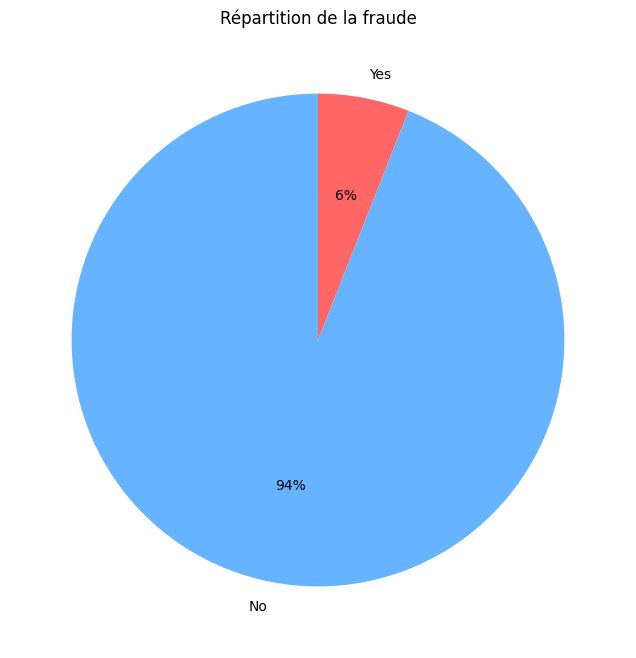

In [ ]:
import matplotlib.pyplot as plt

# Création du pie chart pour la colonne 'FraudFound'
plt.figure(figsize=(10,8))
plt.pie(df['FraudFound'].value_counts().values,
        labels=df['FraudFound'].value_counts().index,
        autopct='%.0f%%',
        colors=['#66b3ff','#ff6666'],
        startangle=90)
plt.title("Répartition de la fraude")
plt.show()


In [ ]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

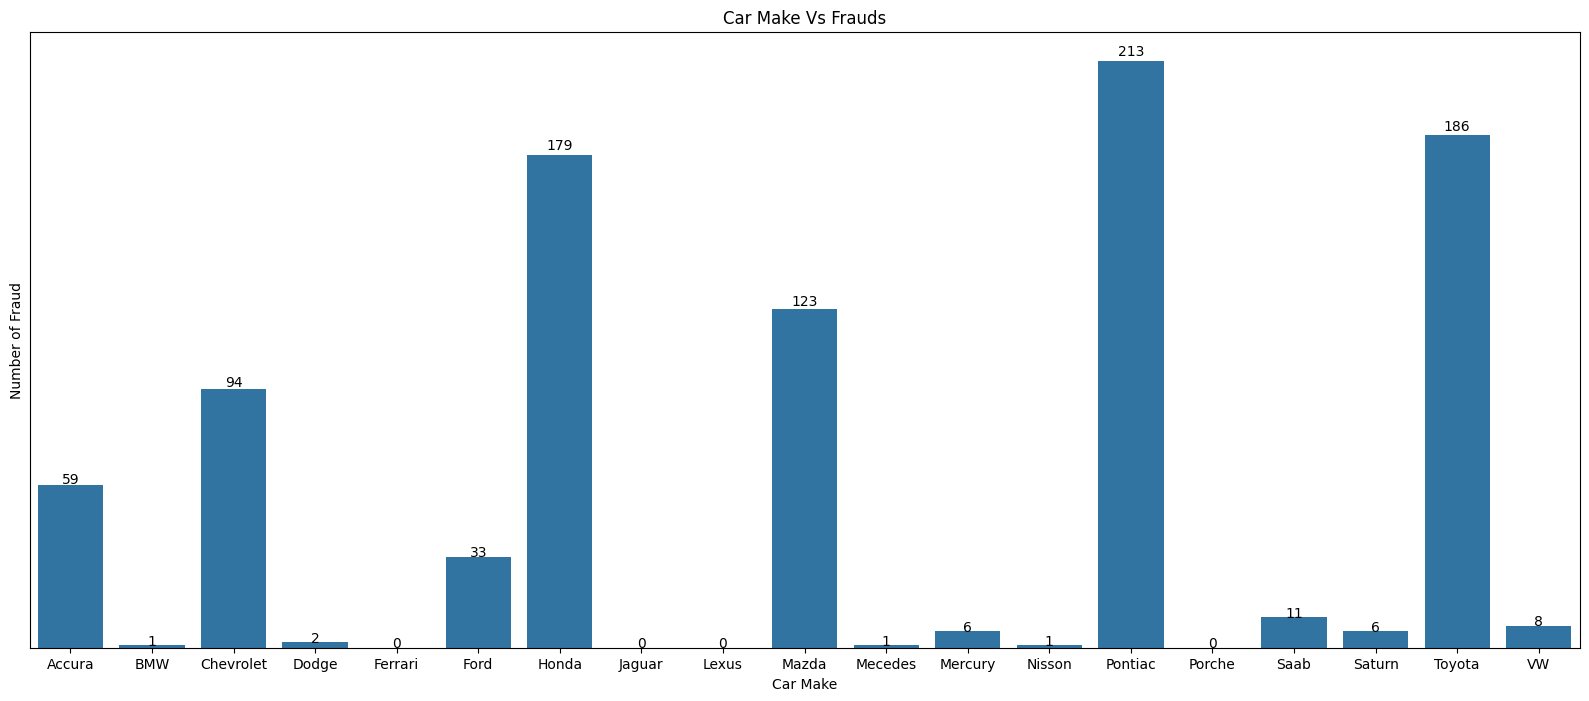

In [ ]:
import seaborn as sns  # IMPORTANT !

make = df.groupby('Make')['FraudFound'].sum()

plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index, y=make.values)

for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
                (p.get_x() + p.get_width()/2, p.get_height()*1.01),
                ha='center')

plt.xlabel("Car Make")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


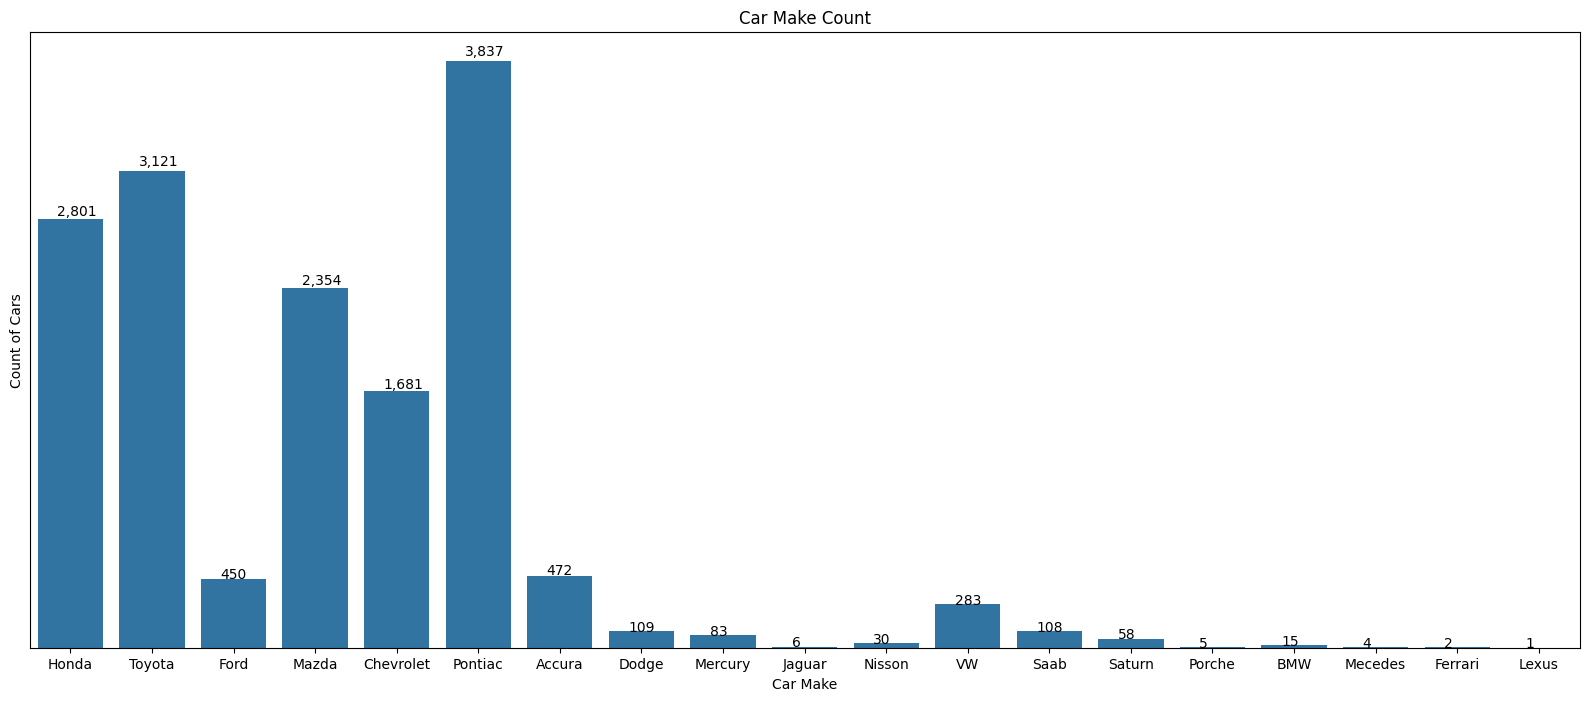

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

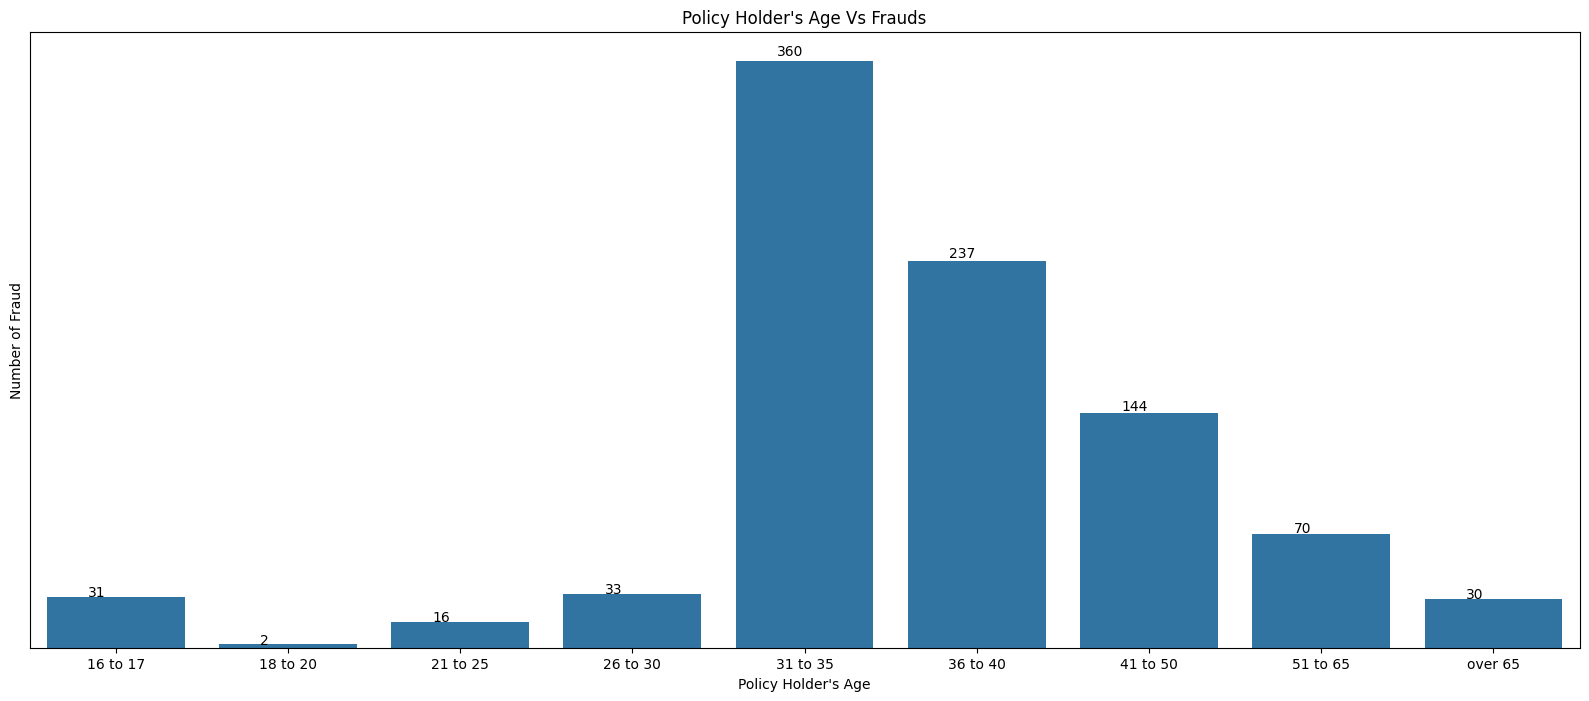

In [ ]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

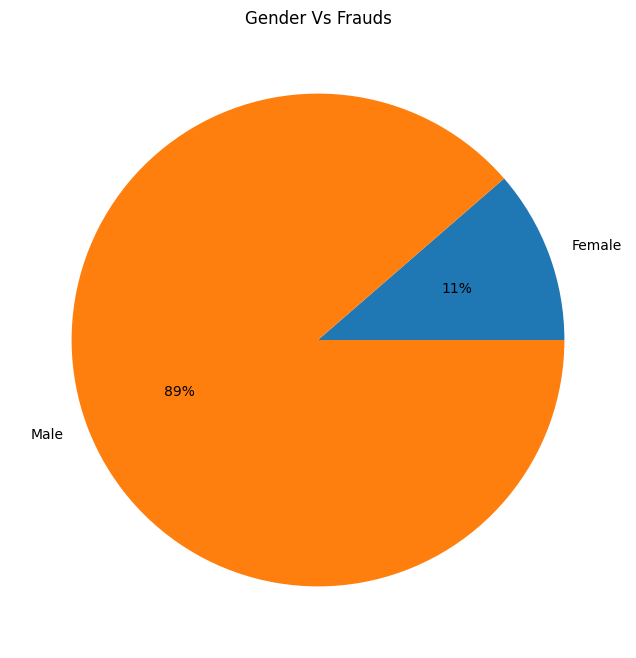

In [ ]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

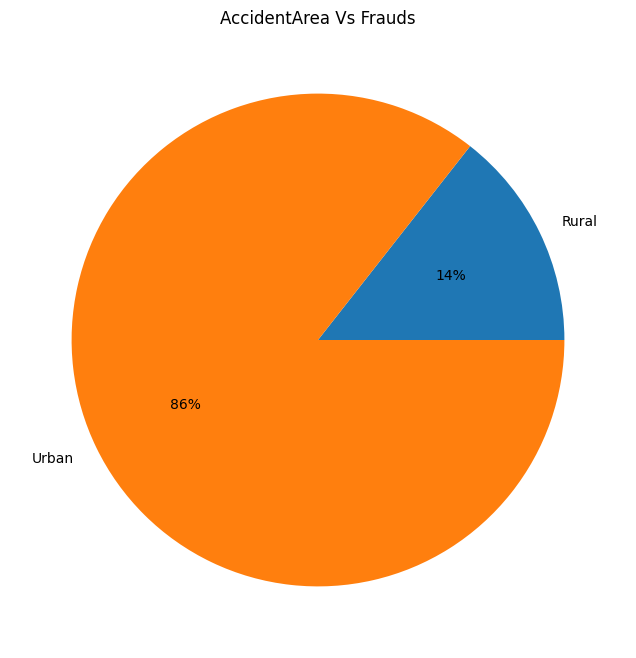

In [ ]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

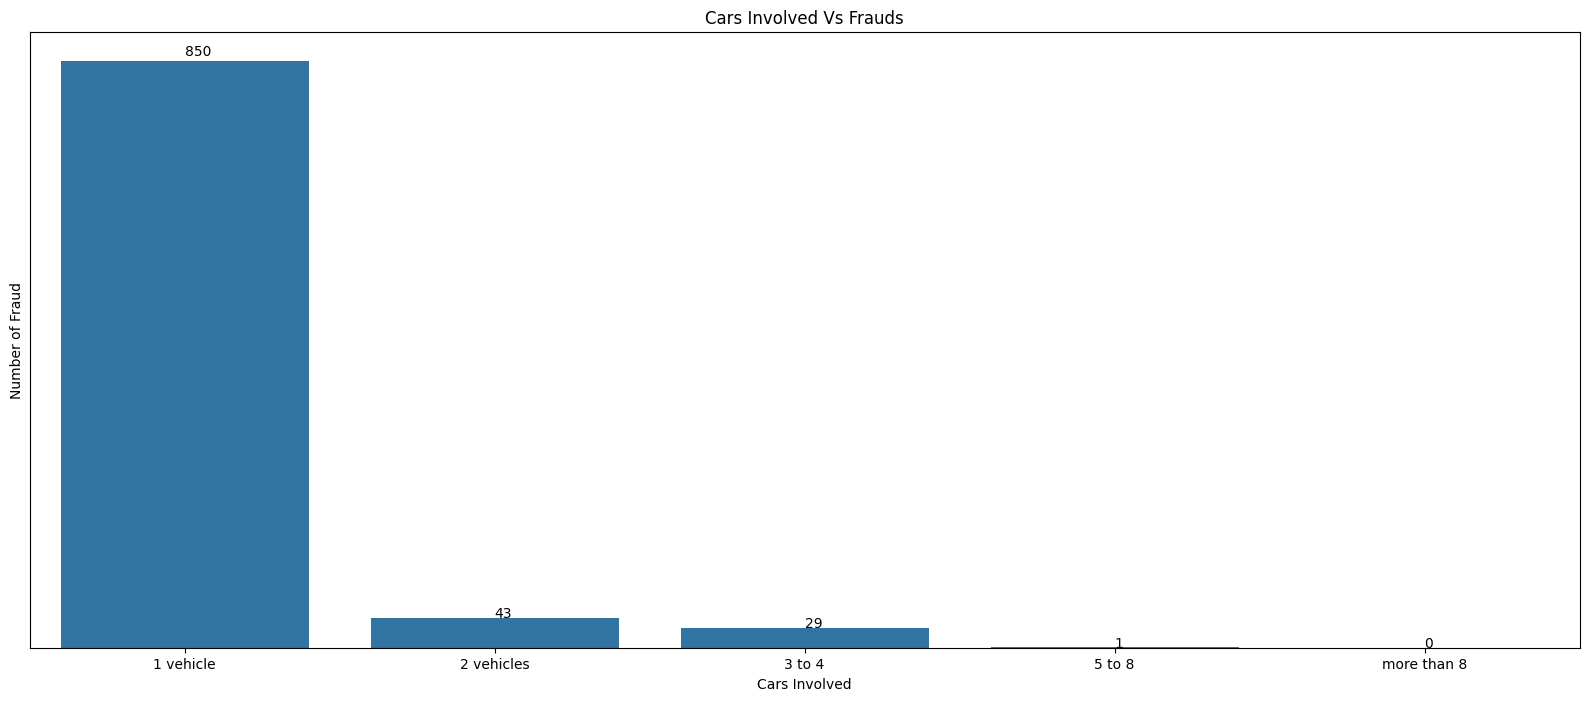

In [ ]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

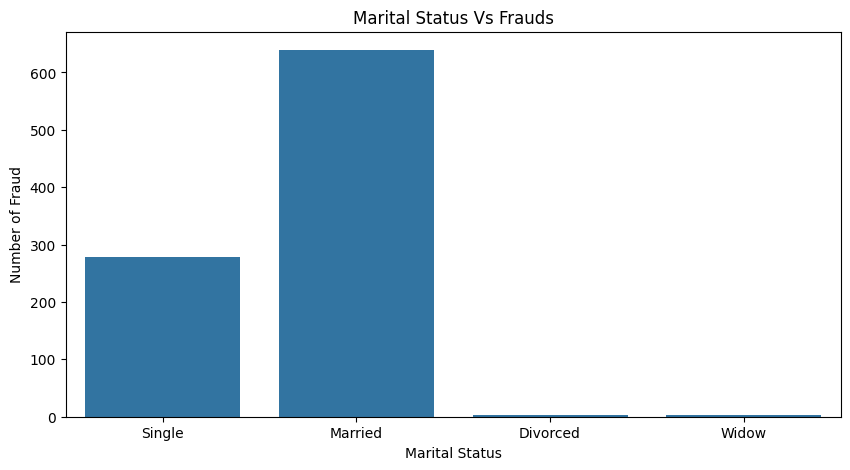

In [ ]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

In [ ]:
from sklearn.preprocessing import LabelEncoder  # <-- IMPORT MANQUANT

le = LabelEncoder()

cols = df.select_dtypes('O').columns  # colonnes object

df[cols] = df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df['Year'])


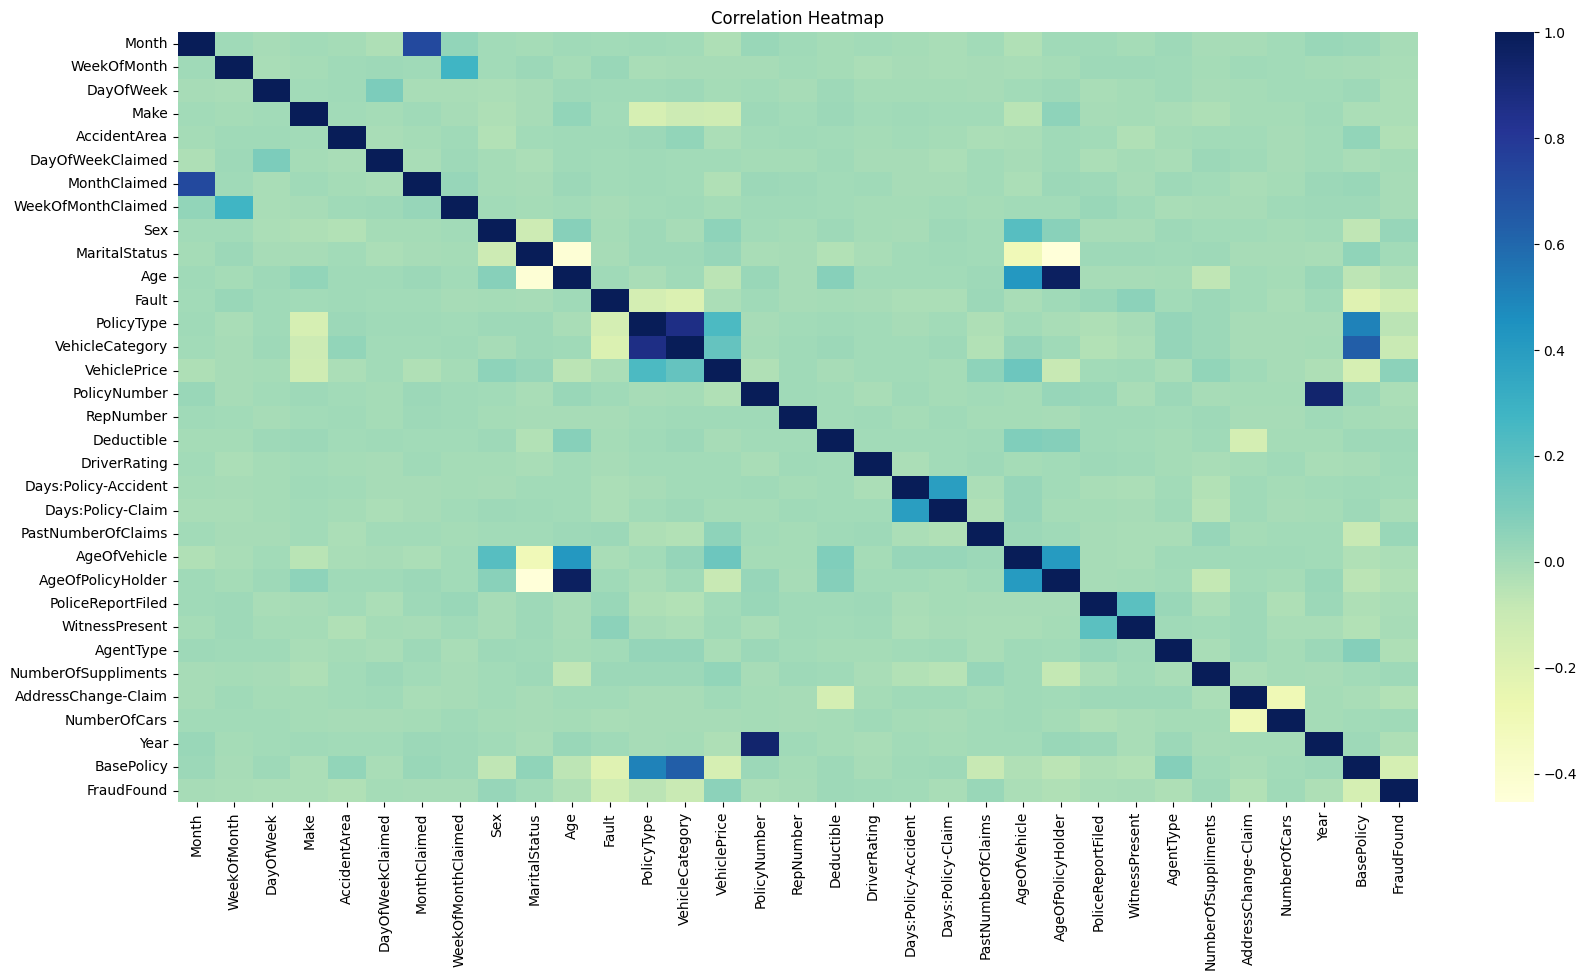

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

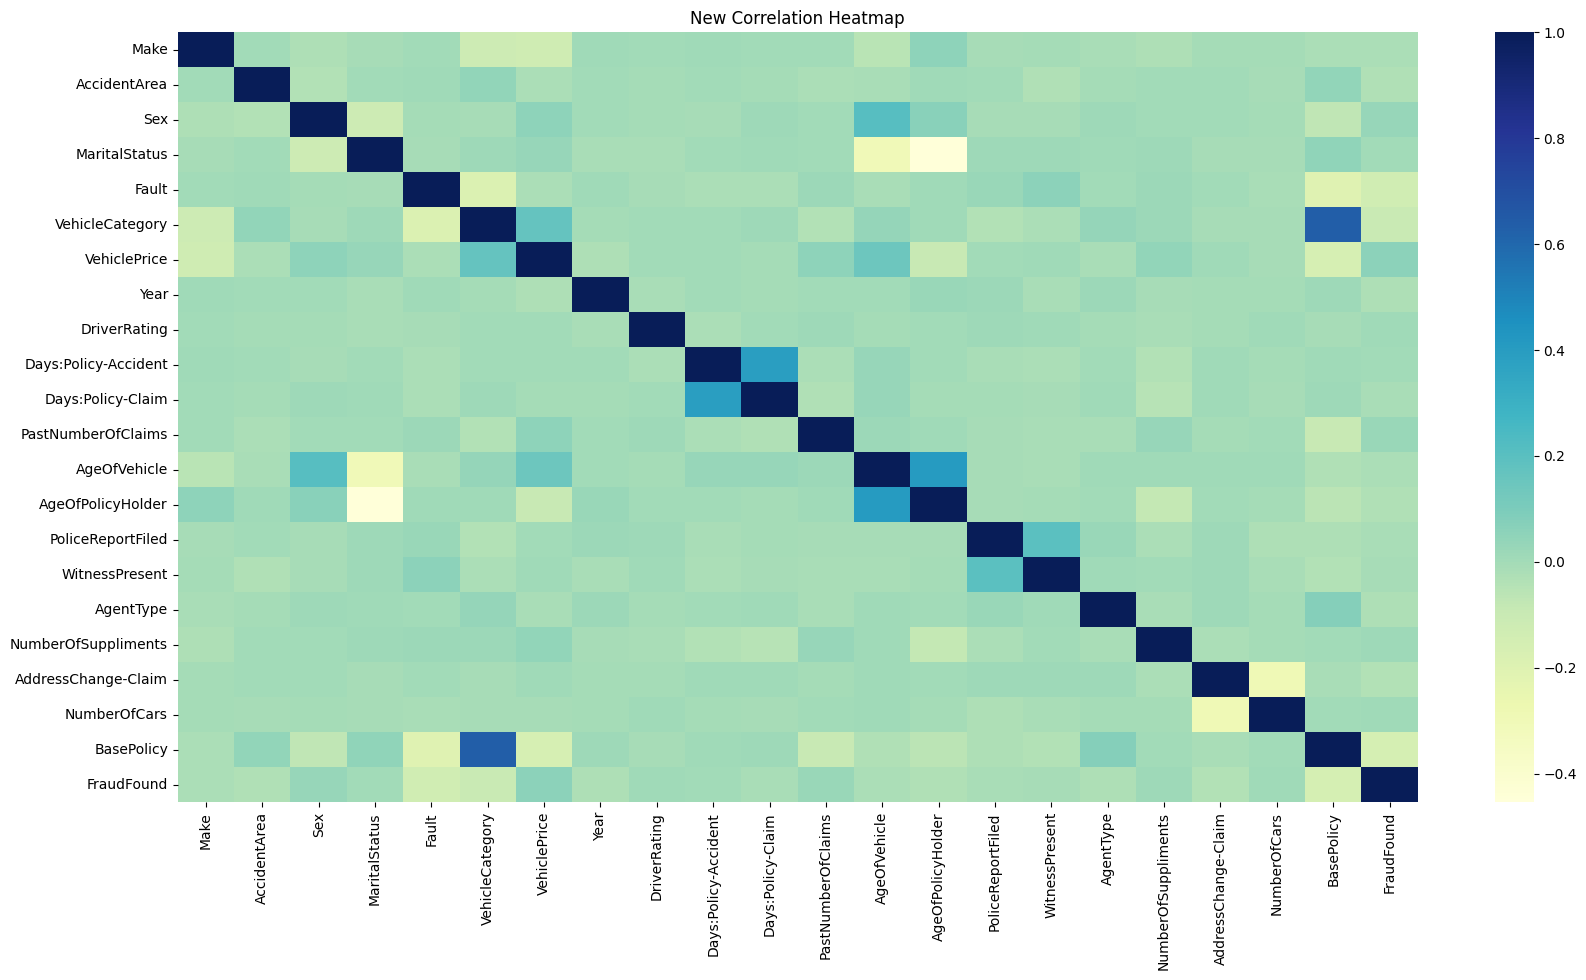

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

In [ ]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

In [ ]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

In [ ]:
# Installer la librairie si pas encore installée
!pip install imbalanced-learn

# Imports nécessaires
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# ----- 1. Encodage Yes/No si pas encore fait -----
df['FraudFound'] = df['FraudFound'].replace({'No': 0, 'Yes': 1}).astype(int)

# ----- 2. Séparer X et y -----
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# ----- 3. Split train/test -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Avant SMOTE :", np.bincount(y_train))

# ----- 4. Appliquer SMOTE sur le TRAIN uniquement -----
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Après SMOTE :", np.bincount(y_train_res))


Avant SMOTE : [10873   692]
Après SMOTE : [10873 10873]


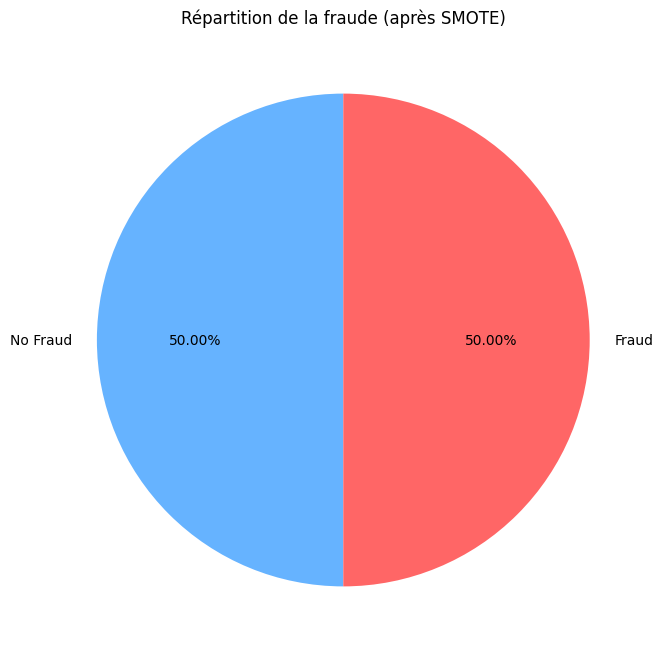

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un DataFrame temporaire à partir de X_train_res et y_train_res
df_smote = pd.DataFrame(X_train_res, columns=X_train.columns)
df_smote['FraudFound'] = y_train_res

# Pie chart
plt.figure(figsize=(10,8))
plt.pie(
    df_smote['FraudFound'].value_counts().values,
    labels=df_smote['FraudFound'].value_counts().index.map({0:'No Fraud', 1:'Fraud'}),
    autopct='%.2f%%',
    startangle=90,
    colors=['#66b3ff', '#ff6666']
)
plt.title("Répartition de la fraude (après SMOTE)")
plt.show()


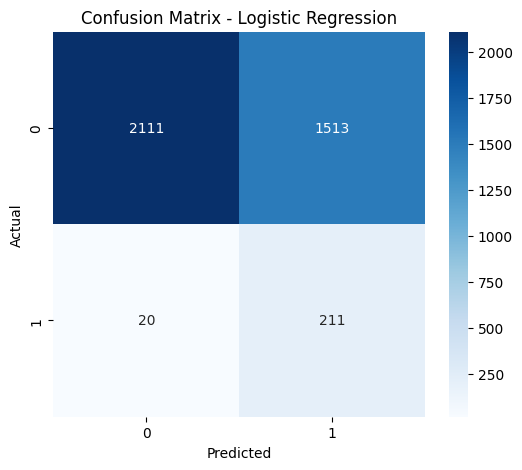


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73      3624
           1       0.12      0.91      0.22       231

    accuracy                           0.60      3855
   macro avg       0.56      0.75      0.47      3855
weighted avg       0.94      0.60      0.70      3855



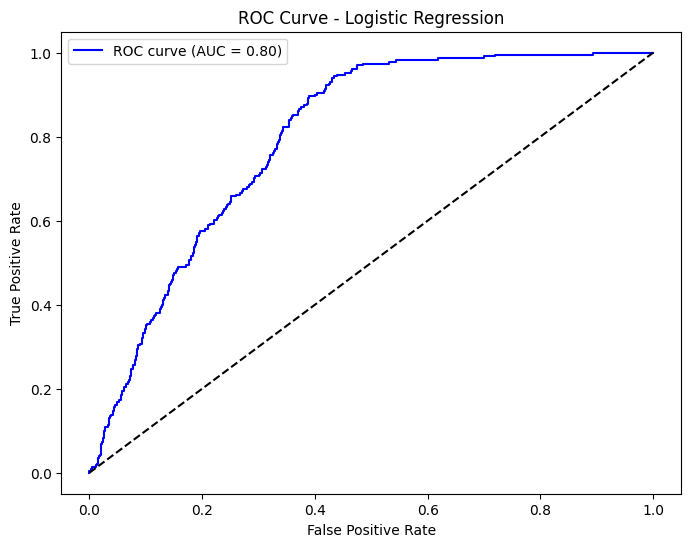

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Encode la variable cible si nécessaire
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE a déjà été appliqué avant
# Ici X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Standardisation des features
# -------------------------------
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)  # train SMOTE
X_test_scaled = scaler.transform(X_test)                # test réel

# -------------------------------
# 6. Entraînement de la régression logistique
# -------------------------------
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_res_scaled, y_train_res)

# -------------------------------
# 7. Prédiction
# -------------------------------
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

# -------------------------------
# 8. Évaluation du modèle
# -------------------------------
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


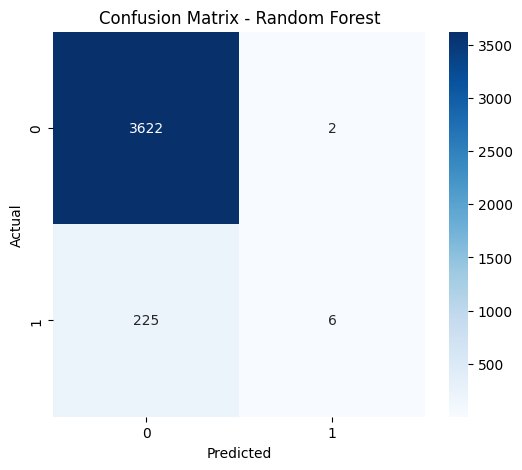


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3624
           1       0.75      0.03      0.05       231

    accuracy                           0.94      3855
   macro avg       0.85      0.51      0.51      3855
weighted avg       0.93      0.94      0.91      3855



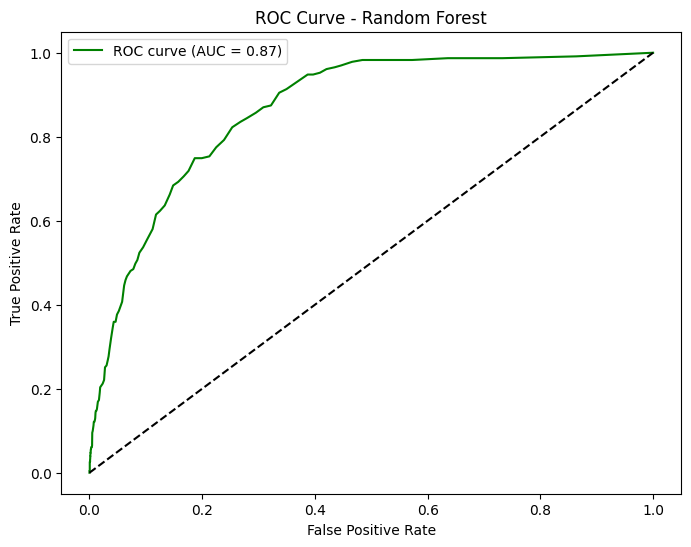

/tmp/ipython-input-2871667801.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')


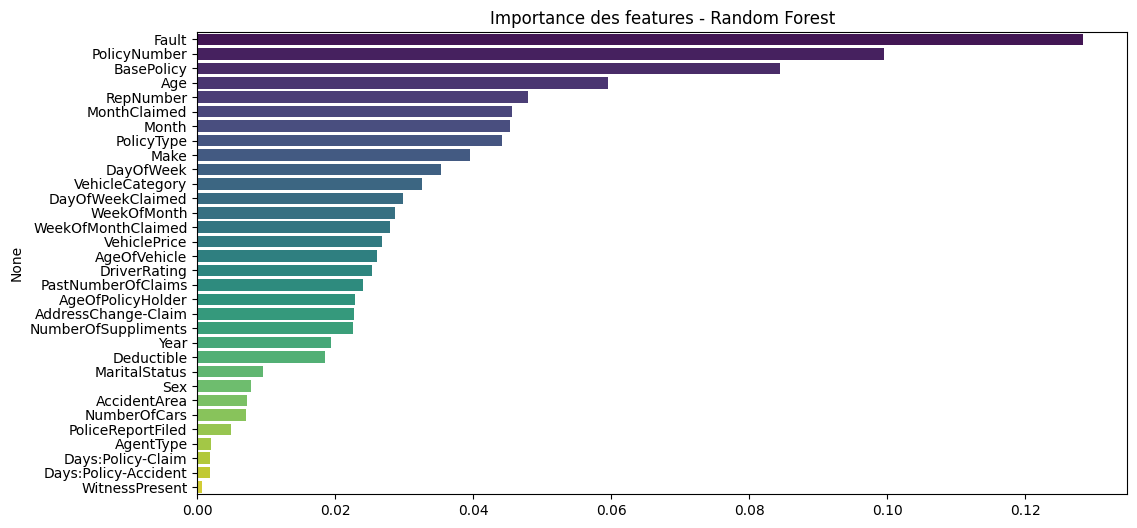

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Standardisation des features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)   # train SMOTE
X_test_scaled = scaler.transform(X_test)            # test réel

# -------------------------------
# 2. Entraînement du Random Forest
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train_scaled, y_train_res)

# -------------------------------
# 3. Prédiction
# -------------------------------
y_pred = rf.predict(X_test_scaled)
y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]

# -------------------------------
# 4. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# -------------------------------
# 5. Importance des features
# -------------------------------
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title("Importance des features - Random Forest")
plt.show()


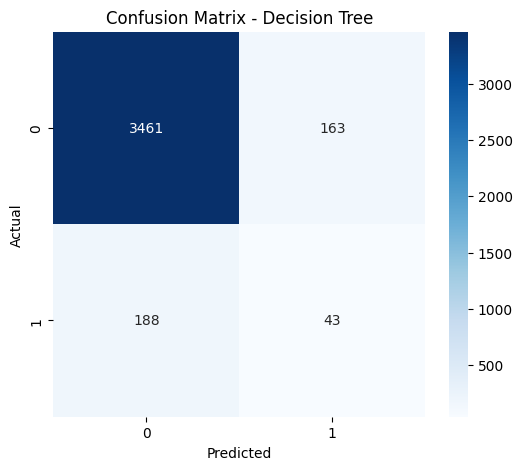


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3624
           1       0.21      0.19      0.20       231

    accuracy                           0.91      3855
   macro avg       0.58      0.57      0.57      3855
weighted avg       0.90      0.91      0.91      3855



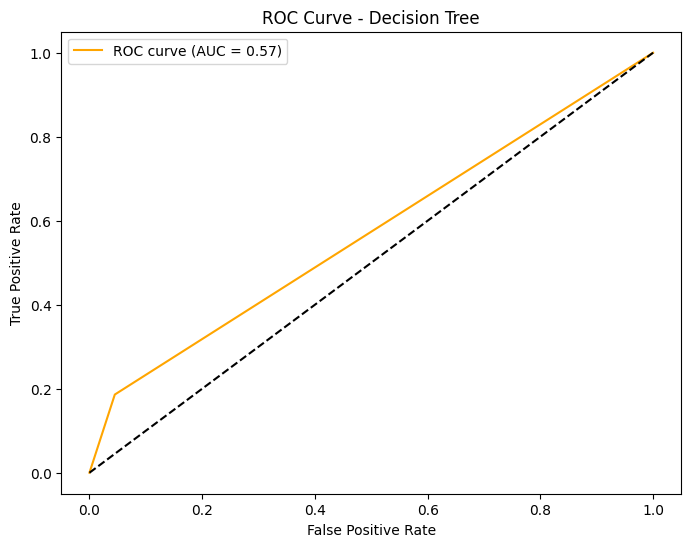

/tmp/ipython-input-534434004.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')


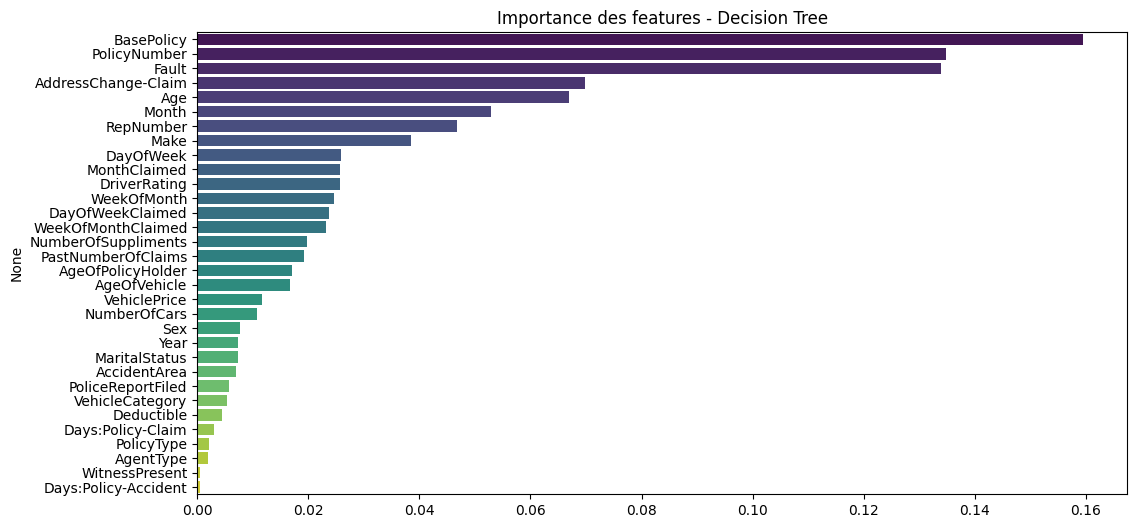

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Encode la variable cible si nécessaire
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE déjà appliqué
# X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Entraînement de l'arbre de décision
# -------------------------------
dt = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_split=2)
dt.fit(X_train_res, y_train_res)

# -------------------------------
# 6. Prédiction
# -------------------------------
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:,1]

# -------------------------------
# 7. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='orange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# -------------------------------
# 8. Importance des features
# -------------------------------
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title("Importance des features - Decision Tree")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:31:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


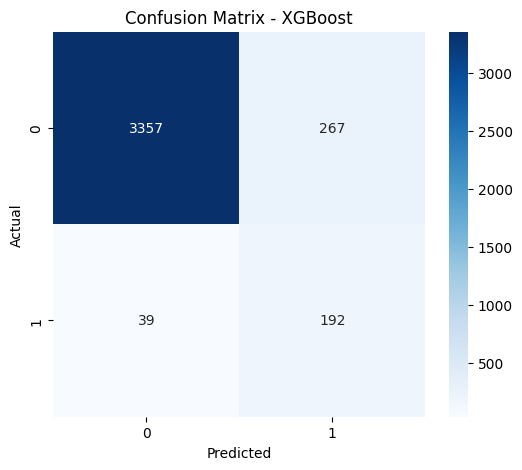


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3624
           1       0.42      0.83      0.56       231

    accuracy                           0.92      3855
   macro avg       0.70      0.88      0.76      3855
weighted avg       0.95      0.92      0.93      3855



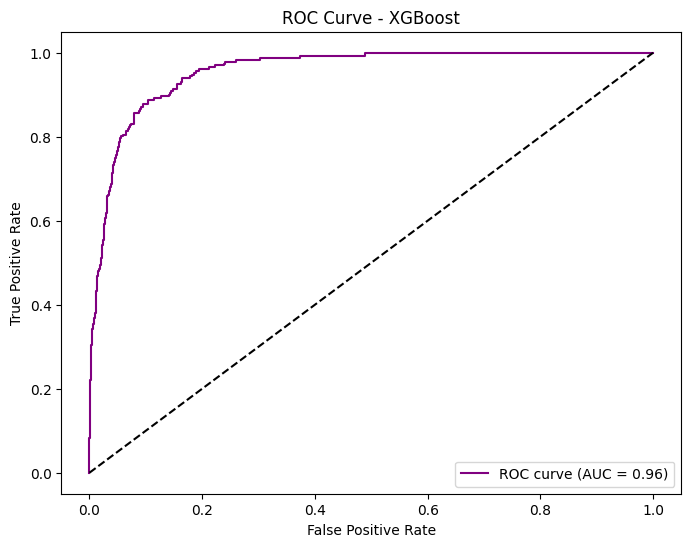

/tmp/ipython-input-2158282051.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')


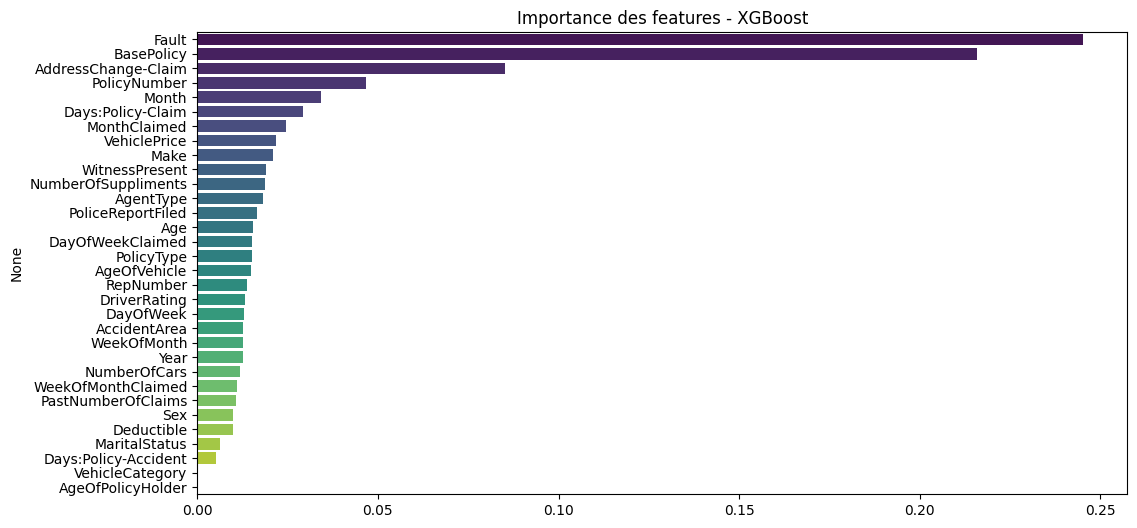

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Encode la variable cible
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE déjà appliqué
# X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Standardisation optionnelle
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6. Entraînement XGBoost
# -------------------------------
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_scaled, y_train_res)

# -------------------------------
# 7. Prédiction
# -------------------------------
y_pred = xgb.predict(X_test_scaled)
y_pred_proba = xgb.predict_proba(X_test_scaled)[:,1]

# -------------------------------
# 8. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='purple')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

# -------------------------------
# 9. Importance des features
# -------------------------------
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette='viridis')
plt.title("Importance des features - XGBoost")
plt.show()


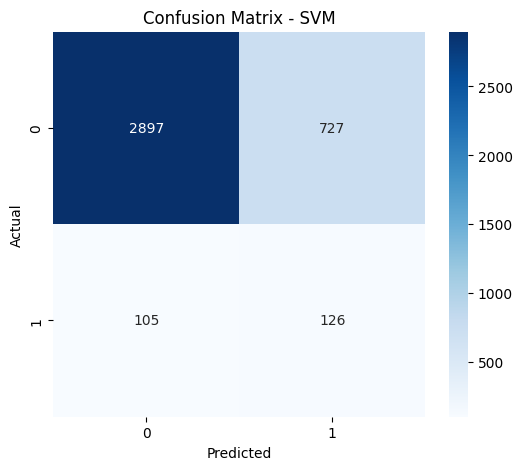


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      3624
           1       0.15      0.55      0.23       231

    accuracy                           0.78      3855
   macro avg       0.56      0.67      0.55      3855
weighted avg       0.92      0.78      0.84      3855



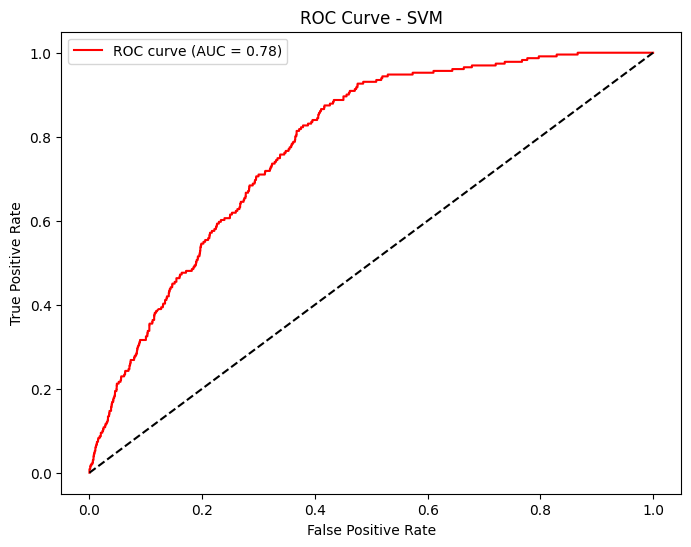

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Encode la variable cible
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE déjà appliqué
# X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Standardisation obligatoire pour SVM
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6. Entraînement SVM
# -------------------------------
svm_model = SVC(
    kernel='rbf',       # Kernel radial basis function
    probability=True,   # Pour obtenir y_pred_proba
    random_state=42
)
svm_model.fit(X_train_scaled, y_train_res)

# -------------------------------
# 7. Prédiction
# -------------------------------
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:,1]

# -------------------------------
# 8. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


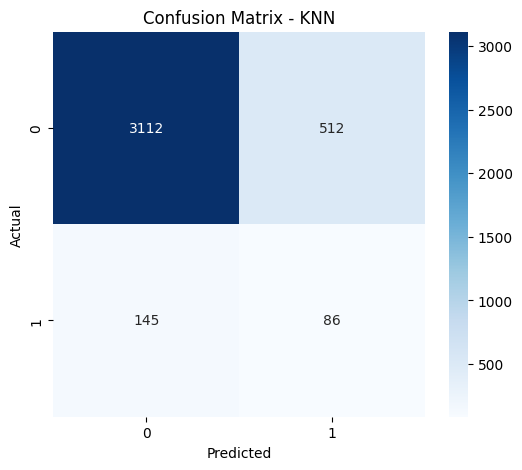


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      3624
           1       0.14      0.37      0.21       231

    accuracy                           0.83      3855
   macro avg       0.55      0.62      0.56      3855
weighted avg       0.91      0.83      0.86      3855



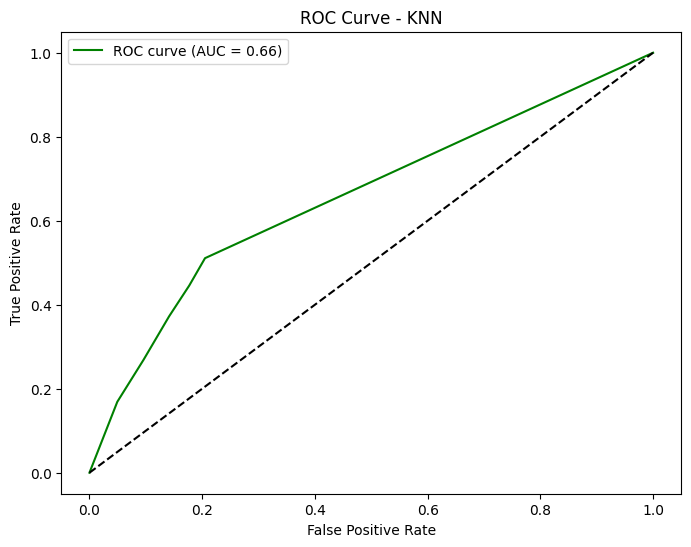

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Encode la variable cible
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE déjà appliqué
# X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Standardisation obligatoire pour KNN
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6. Entraînement KNN
# -------------------------------
knn = KNeighborsClassifier(
    n_neighbors=5,  # nombre de voisins, tu peux tester 3,5,7...
    metric='minkowski',  # distance euclidienne
    p=2
)
knn.fit(X_train_scaled, y_train_res)

# -------------------------------
# 7. Prédiction
# -------------------------------
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

# -------------------------------
# 8. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6351 - loss: 0.6148 - val_accuracy: 0.7182 - val_loss: 0.6304
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7330 - loss: 0.4829 - val_accuracy: 0.7910 - val_loss: 0.6094
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7497 - loss: 0.4606 - val_accuracy: 0.7756 - val_loss: 0.6098
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7586 - loss: 0.4479 - val_accuracy: 0.8097 - val_loss: 0.5642
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7633 - loss: 0.4429 - val_accuracy: 0.8253 - val_loss: 0.5581
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.4320 - val_accuracy: 0.8602 - val_loss: 0.5028
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7727 - loss: 0.4275 - val_accuracy: 0.8434 - val_loss: 0.5197
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7945 - loss: 0.4102 - val_accuracy: 0.

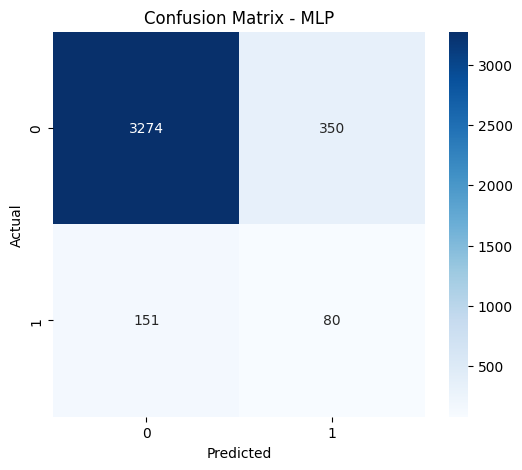


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3624
           1       0.19      0.35      0.24       231

    accuracy                           0.87      3855
   macro avg       0.57      0.62      0.59      3855
weighted avg       0.91      0.87      0.89      3855



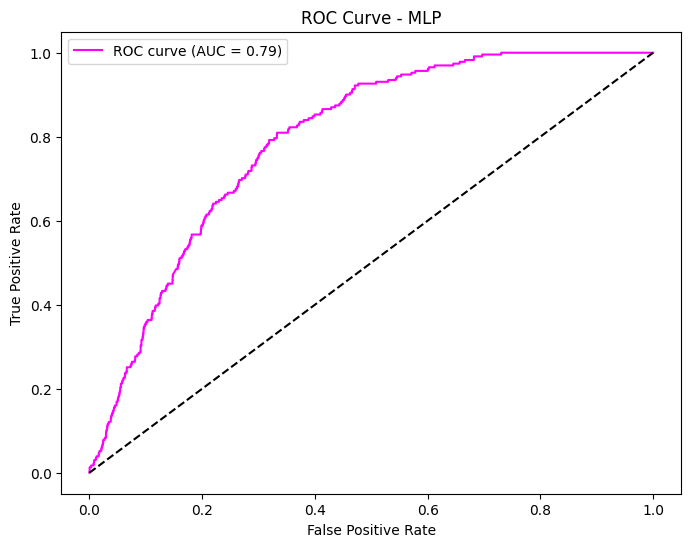

In [ ]:
# -------------------------------
# Imports
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -------------------------------
# 1. Encode la variable cible
# -------------------------------
df['FraudFound'] = df['FraudFound'].replace({'No':0, 'Yes':1}).astype(int)

# -------------------------------
# 2. Séparer X et y
# -------------------------------
X = df.drop('FraudFound', axis=1)
y = df['FraudFound']

# -------------------------------
# 3. Train/Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# -------------------------------
# 4. SMOTE déjà appliqué
# X_train_res et y_train_res sont les données équilibrées
# -------------------------------

# -------------------------------
# 5. Standardisation
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 6. Création du modèle MLP
# -------------------------------
input_dim = X_train_scaled.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # sortie binaire

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# -------------------------------
# 7. Entraînement
# -------------------------------
history = model.fit(
    X_train_scaled, y_train_res,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# -------------------------------
# 8. Prédiction
# -------------------------------
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

# -------------------------------
# 9. Évaluation
# -------------------------------
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='magenta')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP")
plt.legend()
plt.show()
